In [93]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
#Data Import
real_data=pd.read_csv(join('data','Seoul_public_bike.csv'), encoding='CP949')
real_data.head(2) #table로 보여주어 직관적이다.

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-09-02,13,212,212. 여의도역 1번출구 옆,정기권,F,70대~,3,123.3,1.11,4790,67
1,2019-09-13,12,279,279. 영등포 푸르지오 아파트,정기권,NaN,70대~,3,88.75,0.72,3070,26


## data preprocessing

In [95]:
dp = real_data[['성별','이용건수', '운동량', '탄소량','이동거리','사용시간']]
dp.head(5)

,성별,이용건수,운동량,탄소량,이동거리,사용시간
0,F,3,123.3,1.11,4790,67
1,NaN,3,88.75,0.72,3070,26
2,M,3,820.87,5.07,21820,168
3,F,3,21.11,0.19,820,74
4,F,2,472.59,3.08,13260,112


In [96]:
dp.shape

(1000000, 6)

In [99]:
class_counts = dp.groupby('성별').size()
print(class_counts)

성별
F    169024
M    264907
dtype: int64


In [98]:
dp.loc[dp['성별'] == 'f', '성별'] = 'F'
dp.loc[dp['성별'] == 'm', '성별'] = 'M'

C:\Users\Una\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [100]:
print(dp.isnull().sum())

성별      566069
이용건수         0
운동량          0
탄소량          0
이동거리         0
사용시간         0
dtype: int64


In [101]:
dp = dp.dropna(subset=['성별'])

In [102]:
dp.dtypes

성별      object
이용건수     int64
운동량     object
탄소량     object
이동거리     int64
사용시간     int64
dtype: object

In [103]:
idx_n = dp[dp['운동량']=='\\N'].index
dp = dp.drop(idx_n)
dp['운동량'] = pd.to_numeric(dp['운동량'])

In [104]:
idx_n = dp[dp['탄소량']=='\\N'].index
dp = dp.drop(idx_n)
dp['탄소량'] = pd.to_numeric(dp['탄소량'])

In [155]:
dp['탄소량'] = pd.to_numeric(dp['탄소량'] / dp['이용건수'])
dp['운동량'] = pd.to_numeric(dp['운동량'] / dp['이용건수'])
dp['사용시간'] = pd.to_numeric(dp['사용시간'] / dp['이용건수'])
dp['이동거리'] = pd.to_numeric(dp['이동거리'] / dp['이용건수'])
del dp['이용건수']

In [157]:
correlations = dp.corr(method='pearson')
print(correlations)

           운동량       탄소량      이동거리      사용시간
운동량   1.000000  0.982190  0.982190  0.217718
탄소량   0.982190  1.000000  1.000000  0.224423
이동거리  0.982190  1.000000  1.000000  0.224424
사용시간  0.217718  0.224423  0.224424  1.000000


In [158]:
%matplotlib inline 
#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
import matplotlib.pyplot as plt
data=dp

In [159]:
data.head(11)

,성별,운동량,탄소량,이동거리,사용시간
0,F,13.700000,0.123333,532.222222,7.444444
2,M,91.207778,0.563333,2424.444444,18.666667
3,F,2.345556,0.021111,91.111111,8.222222
4,F,118.147500,0.770000,3315.000000,28.000000
6,F,19.885000,0.177500,772.500000,3.750000
7,M,15.637500,0.142500,607.500000,4.250000
8,F,9.010000,0.082500,350.000000,18.000000
10,F,13.900000,0.137500,585.000000,15.000000
12,F,9.900000,0.115000,500.000000,3.250000
13,F,11.132500,0.100000,432.500000,12.500000


In [160]:
data.dtypes

성별       object
운동량     float64
탄소량     float64
이동거리    float64
사용시간    float64
dtype: object

C:\Users\Una\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Una\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Una\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Una\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Una\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Una\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47049 missing from current font.
  f

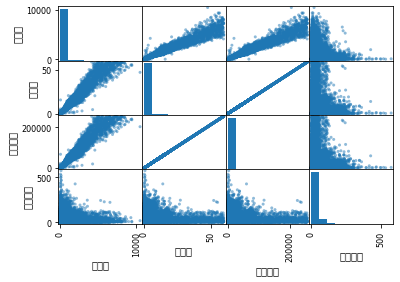

In [161]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

In [162]:
test = dp.iloc[-10:,:]
train = dp.iloc[:-10,:]

print(dp.shape)
print(test.shape)
print(train.shape)

(432447, 5)
(10, 5)
(432437, 5)


In [170]:
# 혹은 scikit learn에서 제공해주는 함수를 사용할 수도 있음
## )r you can use just this 
from sklearn.model_selection import train_test_split

trnx, tstx, trny, tsty = train_test_split(train.iloc[:,1:], train.iloc[:,0], test_size=0.3, random_state=123)

In [171]:
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
y1 = encoder.fit_transform(trny)
trny = pd.get_dummies(y1).values
trny

array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [172]:
encoder =  LabelEncoder()
y1 = encoder.fit_transform(tsty)
tsty = pd.get_dummies(y1).values
tsty

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]], dtype=uint8)

In [173]:
trnx.shape, tstx.shape, trny.shape, tsty.shape

((302705, 4), (129732, 4), (302705, 2), (129732, 2))

In [174]:
trnx = (trnx - np.min(trnx)) / (np.max(trnx) - np.min(trnx))
tstx = (tstx - np.min(tstx)) / (np.max(tstx) - np.min(tstx))

In [178]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(128, kernel_initializer='uniform',input_shape=(4,),activation='relu'))
model.add(Dense(64, kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, kernel_initializer='uniform',activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_43 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_17 (Dropout)         (None, 16)              

In [ ]:
hist = model.fit(trnx, trny, validation_data=(tstx, tsty), epochs=30)

Train on 302705 samples, validate on 129732 samples
Epoch 1/30
302705/302705 [==============================] - 23s 74us/step - loss: 0.6171 - accuracy: 0.6654 - val_loss: 0.5580 - val_accuracy: 0.7405
Epoch 2/30
302705/302705 [==============================] - 21s 68us/step - loss: 0.5340 - accuracy: 0.7434 - val_loss: 0.5558 - val_accuracy: 0.7182
Epoch 3/30
302705/302705 [==============================] - 21s 71us/step - loss: 0.5127 - accuracy: 0.7535 - val_loss: 0.5668 - val_accuracy: 0.7020
Epoch 4/30
302705/302705 [==============================] - 21s 68us/step - loss: 0.5033 - accuracy: 0.7589 - val_loss: 0.5781 - val_accuracy: 0.6971
Epoch 5/30
302705/302705 [==============================] - 21s 70us/step - loss: 0.4947 - accuracy: 0.7618 - val_loss: 0.6734 - val_accuracy: 0.5935
Epoch 6/30
302705/302705 [==============================] - 24s 79us/step - loss: 0.4904 - accuracy: 0.7646 - val_loss: 0.5370 - val_accuracy: 0.7230
Epoch 7/30
302705/302705 [======================

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

In [ ]:
test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]

In [ ]:
encoder =  LabelEncoder()
y1 = encoder.fit_transform(test_y)
test_y = pd.get_dummies(y1).values
test_y

In [ ]:
test_x = (test_x - np.min(test_x)) / (np.max(test_x) - np.min(test_x))

In [128]:
loss, accuracy = model.evaluate(test_x, test_y)
print("Accuracy = {:.2f}".format(accuracy))

10/10 [==============================] - 0s 199us/step
Accuracy = 0.30


In [144]:
from sklearn.metrics import accuracy_score
pred_out = model.predict(test_x)

real =[]
pred_out_idex=[]
class_names=['F','M']

for i,pred in zip(range(0, len(pred_out)), pred_out) :
    print("Predict :",class_names[np.argmax(pred)], ", Real :", class_names[test_y[i,1]])
    real.append(class_names.index(class_names[test_y[i,1]]))
    pred_out_idex.append(np.argmax(pred))
    
# get the accuracy
print (accuracy_score(real, pred_out_idex))

Predict : M , Real : F
Predict : M , Real : M
Predict : M , Real : F
Predict : M , Real : F
Predict : M , Real : F
Predict : M , Real : M
Predict : M , Real : F
Predict : M , Real : F
Predict : F , Real : F
Predict : M , Real : F
0.3
